In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os
from pathlib import Path

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import pandas as pd

data_normal = pd.read_csv('../Data/베어링/0_베어링정상.csv', names=['X'])
data_normal2 = pd.read_csv('../Data/베어링/2_베어링외륜결함.csv', names=['X'])

In [8]:
data_normal = data_normal[:15000000]
data_normal2 = data_normal2[:15000000]

x = data_normal.append(data_normal2)

In [11]:
x.reset_index

<bound method DataFrame.reset_index of                  X
0        -0.025873
1        -0.011678
2        -0.006844
3        -0.007219
4        -0.001965
...            ...
14999995  0.039542
14999996  0.026317
14999997  0.012972
14999998 -0.000390
14999999 -0.013666

[30000000 rows x 1 columns]>

In [18]:
#데이터 전처리 (정규화)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_data = scaler.fit_transform(x)

In [19]:
def make_HI(x):
    y_data = []
    for i in range(len(x)):
        x[i] = np.power(x[i],2)
        x[i] = np.mean(x[i])
        x[i] = np.sqrt(x[i])
    y_data.append(x)
    return y_data

In [21]:
y_data = make_HI(x_data)
y_data = np.array(y_data)


(1, 30000000, 1)

In [43]:
y_data = y_data.reshape(30000000)

In [44]:
y_data.shape

(30000000,)

In [50]:
y = []
for i in range(1,30000000):
    if y_data[i] % 50000 == 0:
        print("성공")
        y.append(y_data[i])

성공


In [56]:
y_train = []
y_train.append(y_data[:25000])
y_train.append(y_data[29975000:])
y_train = np.array(y_train)
y_train.shape

(2, 25000)

In [57]:
y_train = y_train.reshape(50000,-1)

In [22]:
x_data = np.array(x)
x_data = x_data.reshape(-1,600,1)
x_data.shape

(50000, 600, 1)

In [64]:
np.mean(x_data)

-0.012724033938050352

In [60]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])
optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(x_data, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 690s 442ms/step - loss: 0.0039
Epoch 2/20
1563/1563 [==============================] - 698s 446ms/step - loss: 0.0025
Epoch 3/20
1563/1563 [==============================] - 694s 444ms/step - loss: 0.0025
Epoch 4/20
1563/1563 [==============================] - 699s 447ms/step - loss: 0.0025
Epoch 5/20
1563/1563 [==============================] - 698s 446ms/step - loss: 0.0025
Epoch 6/20
1563/1563 [==============================] - 693s 443ms/step - loss: 0.0025
Epoch 7/20
1563/1563 [==============================] - 694s 444ms/step - loss: 0.0025
Epoch 8/20
1563/1563 [==============================] - 693s 444ms/step - loss: 0.0025
Epoch 9/20
1563/1563 [==============================] - 697s 446ms/step - loss: 0.0025
Epoch 10/20
1563/1563 [==============================] - 696s 445ms/step - loss: 0.0025
Epoch 11/20
1563/1563 [==============================] - 695s 444ms/step - loss: 0.0026
Epoch 12/20
1563/1563 [==================

In [ ]:
#기본 RUL 모델(10분짜리 만들어놨음) 돌려야함

In [ ]:
k = np.mean(x_data)

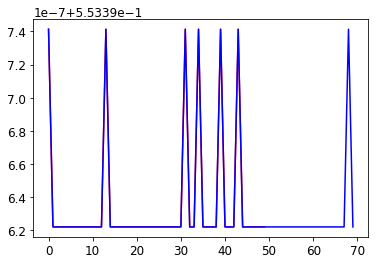

In [88]:
plt.plot(model.predict(x_data[:50]),"r")
plt.plot(model.predict(x_data[:70]),"b")
#plt.ylim(0.006,0.008)
plt.show()